# Frank Hertz Experiment


## Importing main pkg


In [1]:
using Plots
using CSV, DataFrames
using Unitful
using LaTeXStrings
using Peaks
pgfplotsx();

## Reading Data through file

In the `.csv` values are in `nA`


In [2]:
data = CSV.read("data-rishab.tsv", delim='\t', DataFrame)
data2 = CSV.read("data-rishab-vg2a.tsv", delim='\t', DataFrame)

89×3 DataFrame
 Row │ VG2K   VG2A = 7.5  VG2A = 10 
     │ Int64  Float64     Float64   
─────┼──────────────────────────────
   1 │     2        0.03       0.04
   2 │     3        0.04       0.04
   3 │     4        0.04       0.04
   4 │     5        0.04       0.04
   5 │     6        0.04       0.04
   6 │     7        0.04       0.04
   7 │     8        0.04       0.04
   8 │     9        0.04       0.04
  ⋮  │   ⋮        ⋮           ⋮
  83 │    84        2.51       1.32
  84 │    85        3.18       0.91
  85 │    86        4.29       1.08
  86 │    87        5.21       1.72
  87 │    88        6.05       2.77
  88 │    89        6.53       3.86
  89 │    90        6.66       4.61
                     74 rows omitted

### Adding units to the data


In [6]:
VG2K = data[!, 1] .* 1u"V";
VG1K_1 = data[!, 2] .* 1u"nA";
VG1K_2 = data[!, 3] .* 1u"nA";
VG1K_3 = data[!, 4] .* 1u"nA";
VG2A_10 = data2[!, 3] .* 1u"nA";

### Finding local minima

Since we are interested in local minima of these curves for energy difference between different energy levels.


In [4]:
min_indices = Peaks.findminima(VG1K_1)[1]

6-element Vector{Int64}:
 23
 35
 47
 58
 70
 82

## Plotting the Data


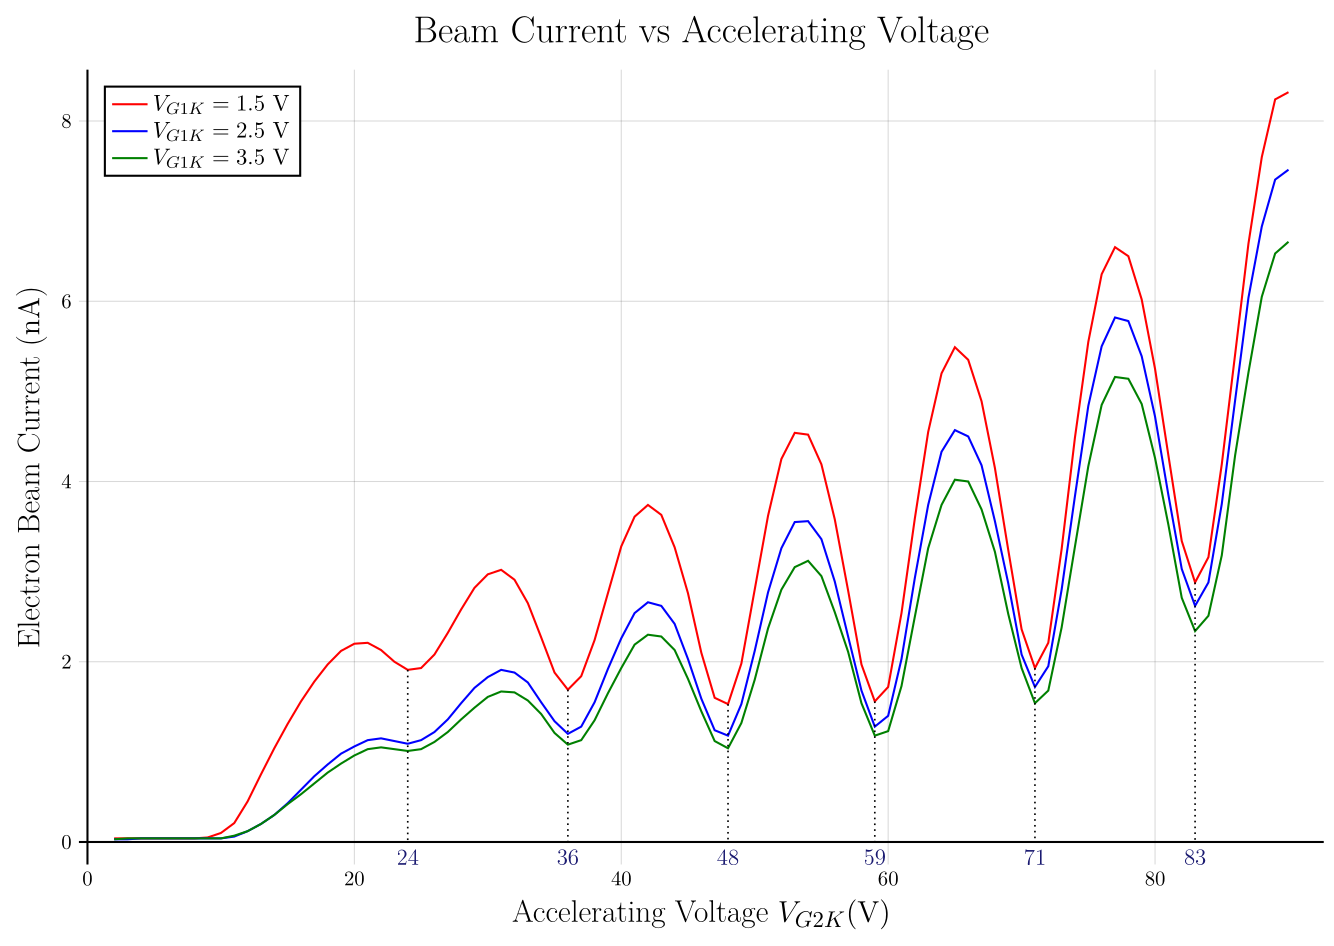

In [5]:
plot_height, plot_width = 11.69, 8.27 # Setting the szie of the plot

plt = plot(VG2K, [VG1K_1 VG1K_2 VG1K_3], label=[L"$V_{G1K} = 1.5~\mathrm{V}$" L"$V_{G1K} = 2.5~\mathrm{V}$" L"$V_{G1K} = 3.5~\mathrm{V}$"], lw=1, lc=[:red :blue :green]) # plotting the main data

for i in min_indices
    plot!([VG2K[i], VG2K[i]], [VG1K_1[i], 0u"nA"], lw=:0.8, lc=:black, label="", ls=:dot) # plotting vertical lines for minima
end

for i in min_indices
    annotate!(data.VG2K[i], 0, Plots.text(data.VG2K[i], :midnightblue, :top, 11)) # annotating these points on x-axis
end

plot!(
    size=(900, 600),
    extra_kwargs=Dict(:plot => Dict("height" => "$(plot_height)in", "width" => "$(plot_width)in")),
    dpi=300,
    title="Beam Current vs Accelerating Voltage",
    xlabel=L"Accelerating Voltage $V_{G2K} (\mathrm{V})$",
    ylabel=L"Electron Beam Current ($\mathrm{nA}$)",
    legendfontsize=11,
    titlefontsize=18,
    tickfontsize=10,
    guidefontsize=15,
    ga=0.15,
    formatter=:scientific,
    legend=:topleft,
    framestyle=:zerolines,
    draw_arrow=true,
) # some formatting about these graphs

Plots.pdf("main.pdf")
plt

## Comparing $V_{G2A}$


In [7]:
min_indices_10 = Peaks.findminima(VG2A_10)[1]

6-element Vector{Int64}:
 25
 37
 49
 60
 72
 84

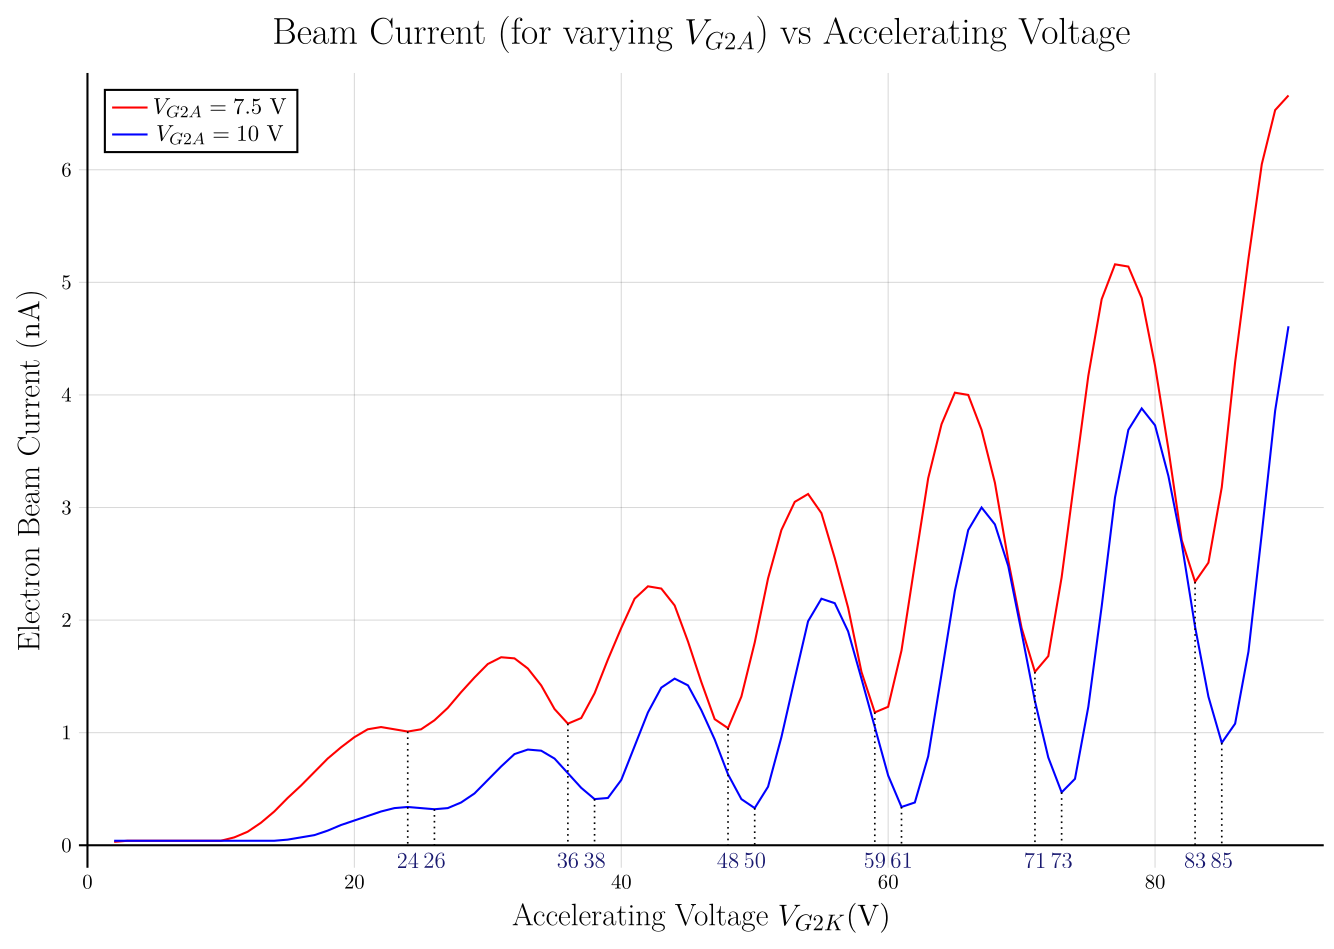

In [18]:
plot_height, plot_width = 11.69, 8.27 # Setting the szie of the plot

plt = plot(VG2K, [VG1K_3 VG2A_10], label=[L"$V_{G2A} = 7.5~\mathrm{V}$" L"$V_{G2A} = 10~\mathrm{V}$"], lw=1, lc=[:red :blue]) # plotting the main data

for (i, j) in zip(min_indices, min_indices_10)
    plot!([VG2K[i], VG2K[i]], [VG1K_3[i], 0u"nA"], lw=:0.8, lc=:black, label="", ls=:dot) # plotting vertical lines for minima
    plot!([VG2K[j], VG2K[j]], [VG2A_10[j], 0u"nA"], lw=:0.8, lc=:black, label="", ls=:dot) # plotting vertical lines for minima
end

for (i, j) in zip(min_indices, min_indices_10)
    annotate!(data.VG2K[i], 0, Plots.text(data.VG2K[i], :midnightblue, :top, 11)) # annotating these points on x-axis
    annotate!(data.VG2K[j], 0, Plots.text(data.VG2K[j], :midnightblue, :top, 11)) # annotating these points on x-axis
end

plot!(
    size=(900, 600),
    extra_kwargs=Dict(:plot => Dict("height" => "$(plot_height)in", "width" => "$(plot_width)in")),
    dpi=300,
    title=L"Beam Current (for varying $V_{G2A}$) vs Accelerating Voltage",
    xlabel=L"Accelerating Voltage $V_{G2K} (\mathrm{V})$",
    ylabel=L"Electron Beam Current ($\mathrm{nA}$)",
    legendfontsize=11,
    titlefontsize=18,
    tickfontsize=10,
    guidefontsize=15,
    ga=0.15,
    formatter=:scientific,
    legend=:topleft,
    framestyle=:zerolines,
    draw_arrow=true,
) # some formatting about these graphs

Plots.pdf("main-vg2a.pdf")
plt